In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots

In [2]:
#importing the dataset
df=pd.read_csv("used cars regression.csv")

In [3]:
#checking the head of the data
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74


In [4]:
#checking the info and if there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5862 non-null   int64  
 1   Name               5862 non-null   object 
 2   Location           5862 non-null   object 
 3   Year               5862 non-null   int64  
 4   Kilometers_Driven  5862 non-null   int64  
 5   Fuel_Type          5862 non-null   object 
 6   Transmission       5862 non-null   object 
 7   Owner_Type         5862 non-null   object 
 8   Mileage            5862 non-null   float64
 9   Engine             5862 non-null   int64  
 10  Power              5862 non-null   float64
 11  Seats              5862 non-null   int64  
 12  Price              5862 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 595.5+ KB


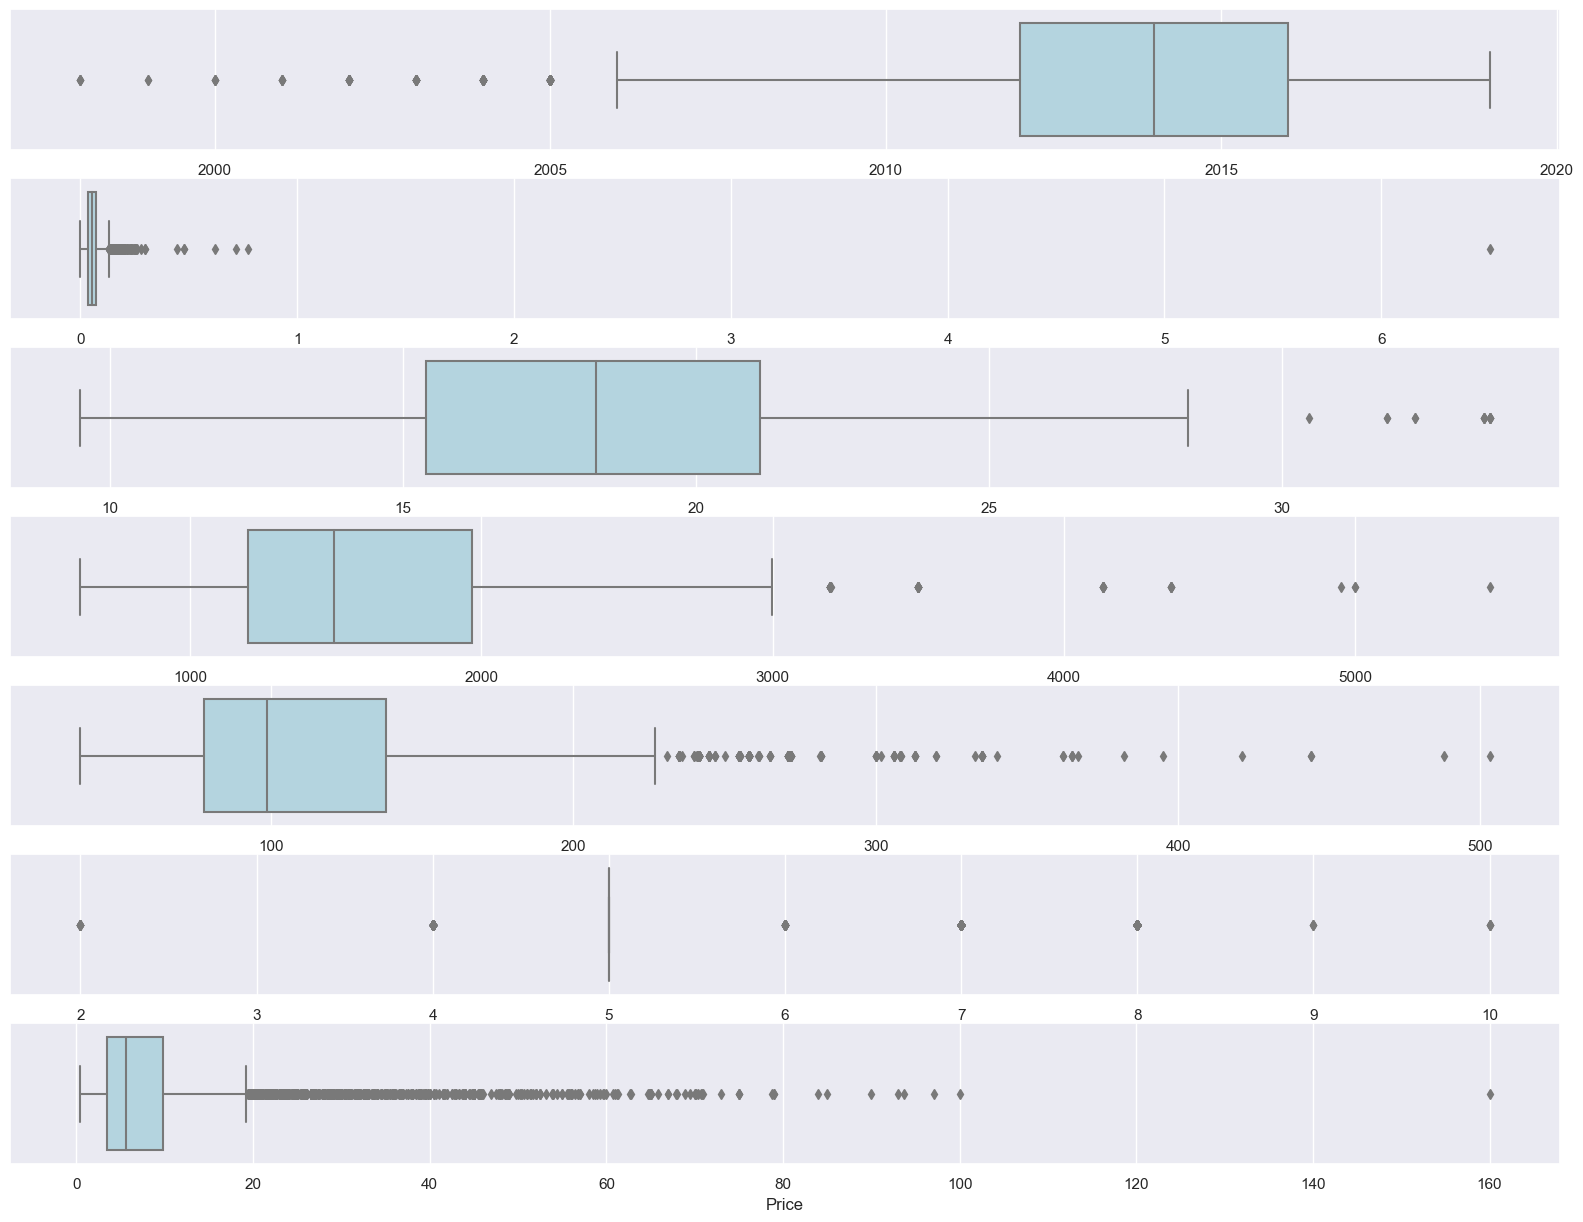

In [5]:
# Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(7,1,1)
sns.boxplot(x= df.Year, color='lightblue')

plt.subplot(7,1,2)
sns.boxplot(x= df.Kilometers_Driven, color='lightblue')

plt.subplot(7,1,3)
sns.boxplot(x= df.Mileage, color='lightblue')

plt.subplot(7,1,4)
sns.boxplot(x= df.Engine, color='lightblue')

plt.subplot(7,1,5)
sns.boxplot(x= df.Power, color='lightblue')

plt.subplot(7,1,6)
sns.boxplot(x= df.Seats, color='lightblue')

plt.subplot(7,1,7)
sns.boxplot(x= df.Price, color='lightblue')

plt.show()

In [6]:
# a brief summary for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5862.0,3013.207267,1737.649583,0.00,1510.25,3014.50,4515.7500,6018.00
Year,5862.0,2013.441829,3.197734,1998.00,2012.00,2014.00,2016.0000,2019.00
Kilometers_Driven,5862.0,58657.392869,92247.830000,600.00,33948.25,53000.00,73000.0000,6500000.00
Mileage,5862.0,18.404587,4.131614,9.50,15.40,18.30,21.1000,33.54
Engine,5862.0,1613.519447,575.394869,624.00,1198.00,1493.00,1968.0000,5461.00
Power,5862.0,112.533802,50.911135,37.00,78.00,98.60,138.0300,503.00
Seats,5862.0,5.284374,0.795284,2.00,5.00,5.00,5.0000,10.00
Price,5862.0,9.401395,10.941552,0.45,3.50,5.65,9.8375,160.00


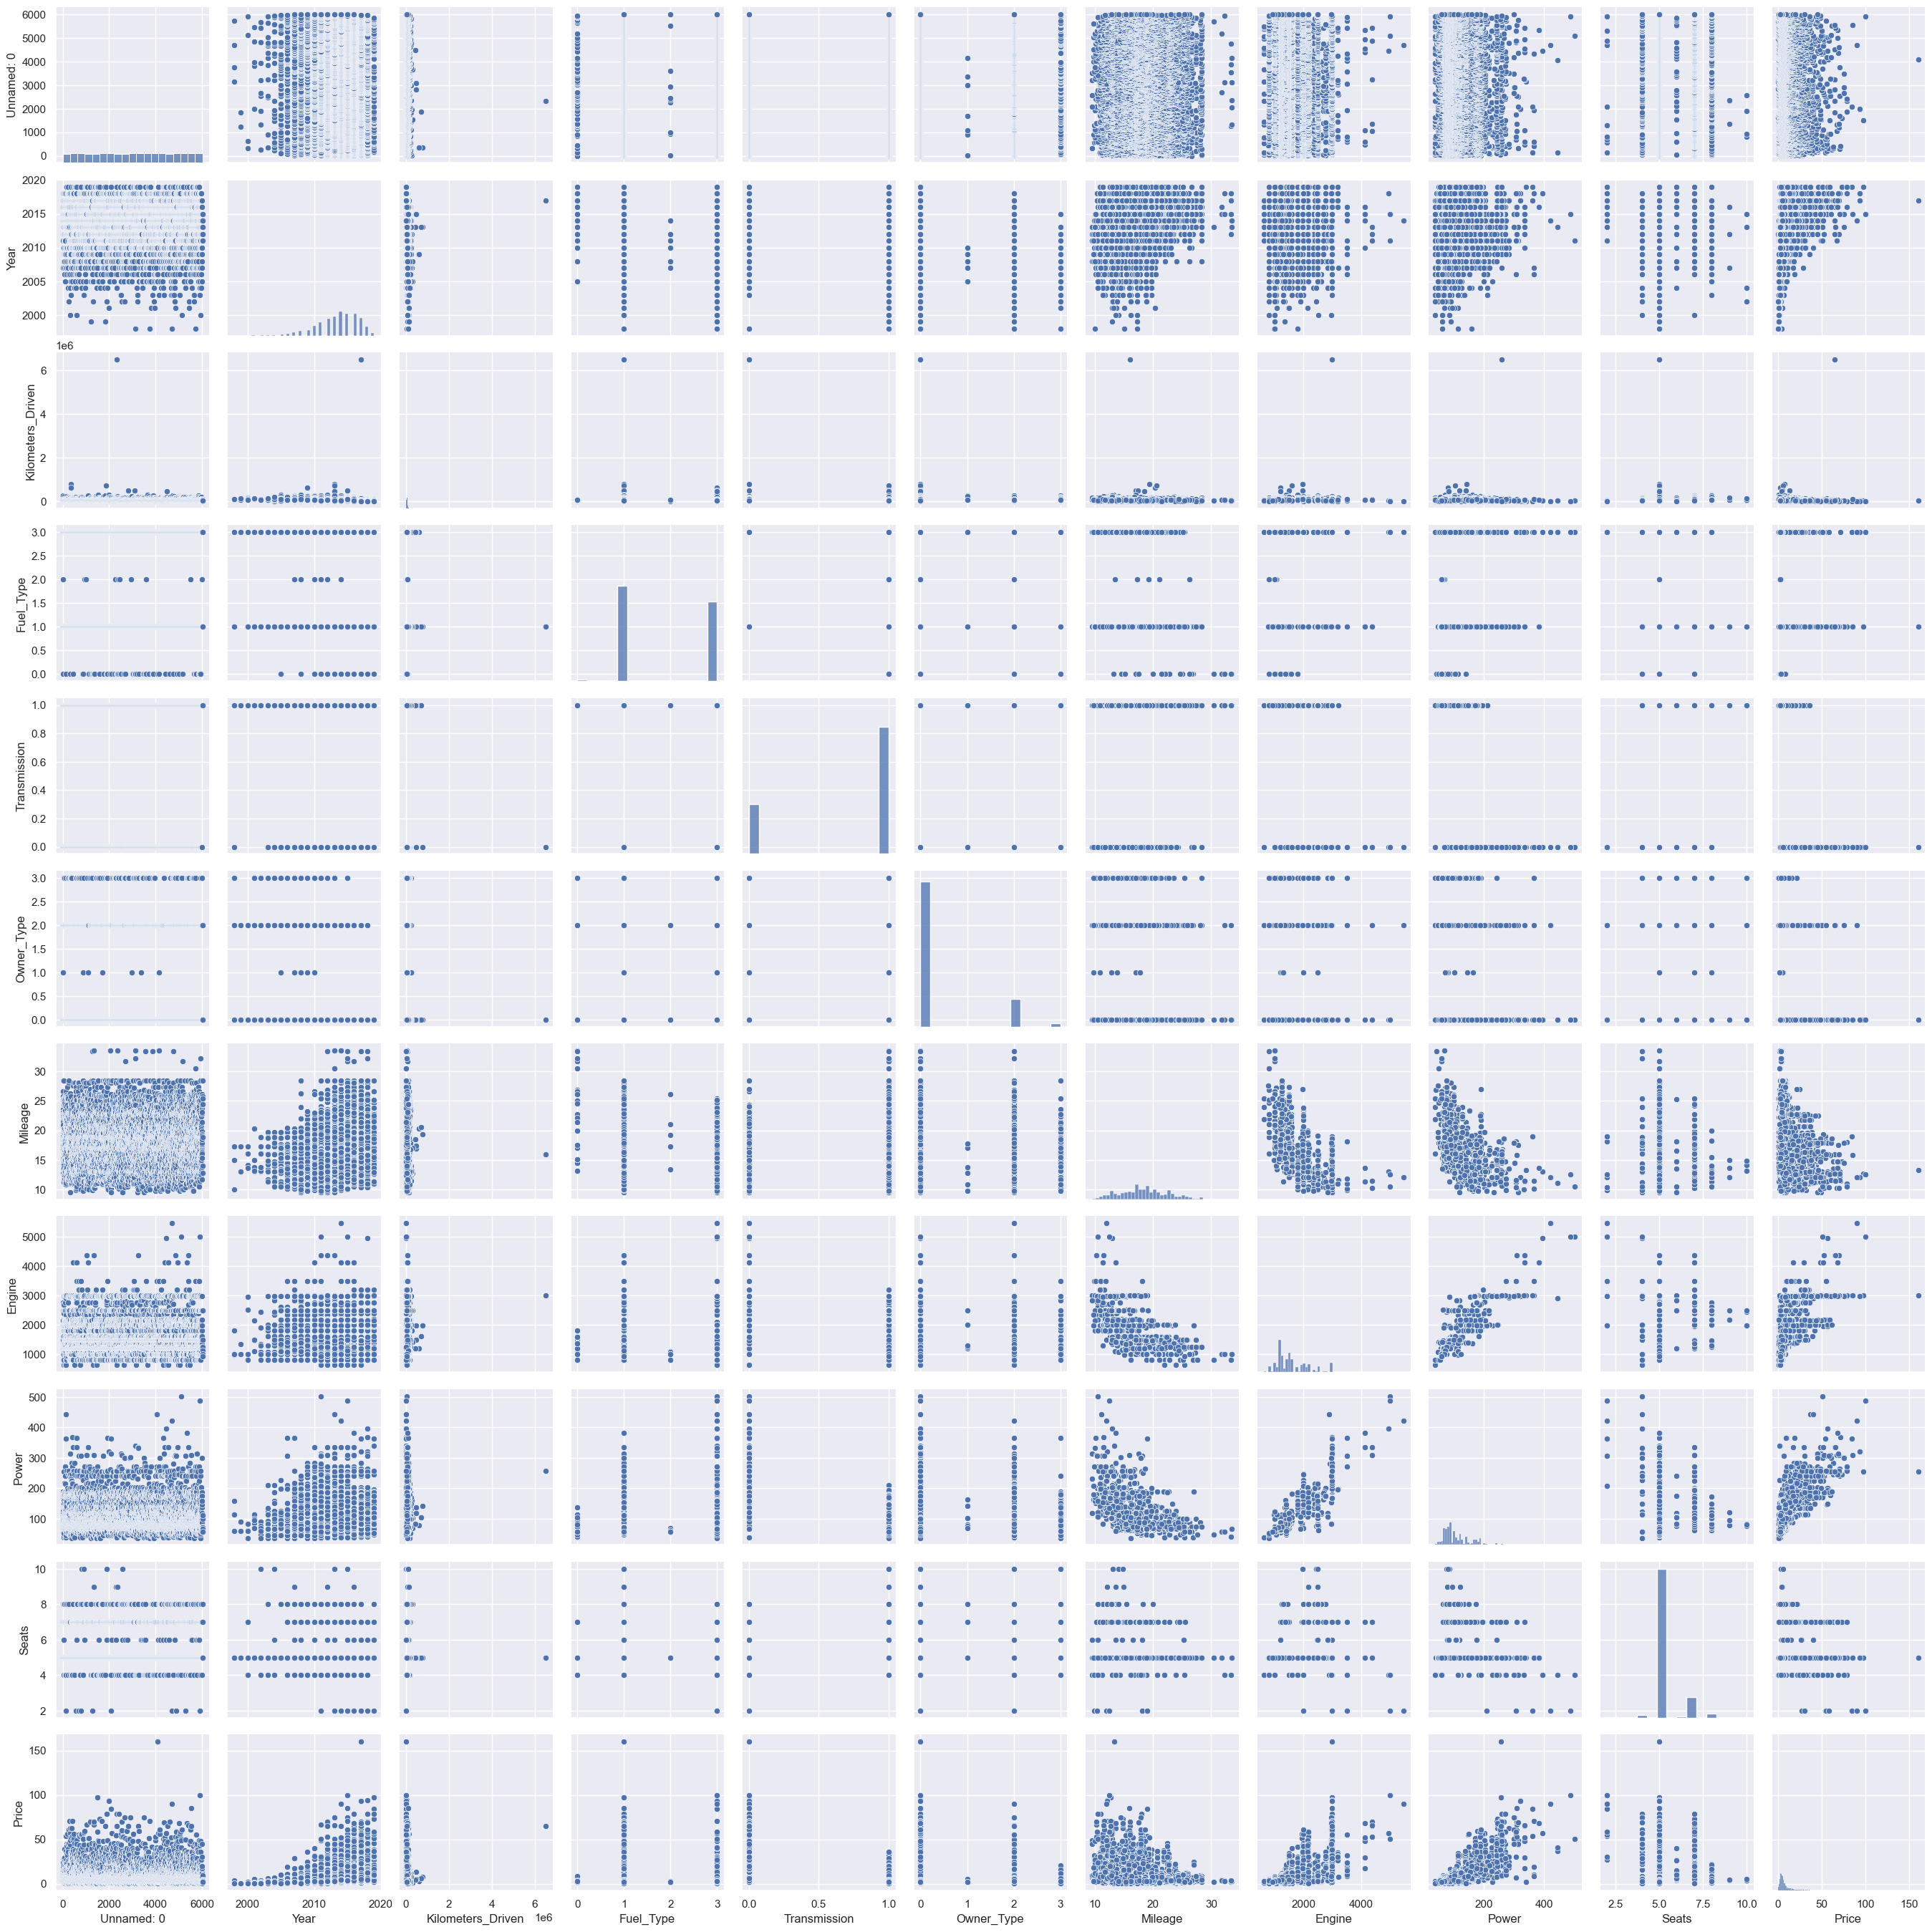

In [7]:
# Label encoding the variables before doing a pairplot because pairplot ignores strings

df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['Fuel_Type', 'Transmission', 'Owner_Type']] = df_encoded.loc[:,['Fuel_Type', 'Transmission', 'Owner_Type']].apply(LabelEncoder().fit_transform) 
sns.pairplot(df_encoded)  #pairplot
plt.show()

In [8]:
df_encoded.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,0,1,0,26.60,998,58.16,5,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,1,0,19.67,1582,126.20,5,12.50
2,2,Honda Jazz V,Chennai,2011,46000,3,1,0,18.20,1199,88.70,5,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,1,1,0,20.77,1248,88.76,7,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,1,0,2,15.20,1968,140.80,5,17.74


In [9]:
#check the correlation of the data
df_encoded.corr()

,Unnamed: 0,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Unnamed: 0,1.000000,0.002958,-0.009025,0.020297,0.021350,-0.000713,0.019816,-0.014889,-0.022398,-0.009360,-0.025621
Year,0.002958,1.000000,-0.170425,-0.115021,-0.099345,-0.379721,0.292472,-0.043130,0.031728,0.010632,0.314818
Kilometers_Driven,-0.009025,-0.170425,1.000000,-0.103210,0.025030,0.079404,-0.066331,0.097819,0.038105,0.082729,-0.006030
Fuel_Type,0.020297,-0.115021,-0.103210,1.000000,0.115745,0.039469,-0.154140,-0.420643,-0.282610,-0.302252,-0.308879
Transmission,0.021350,-0.099345,0.025030,0.115745,1.000000,0.004414,0.353311,-0.492562,-0.647721,0.063812,-0.585340
Owner_Type,-0.000713,-0.379721,0.079404,0.039469,0.004414,1.000000,-0.149284,0.051189,0.023791,0.005429,-0.100085
Mileage,0.019816,0.292472,-0.066331,-0.154140,0.353311,-0.149284,1.000000,-0.644130,-0.547859,-0.373266,-0.324723
Engine,-0.014889,-0.043130,0.097819,-0.420643,-0.492562,0.051189,-0.644130,1.000000,0.854331,0.453943,0.657128
Power,-0.022398,0.031728,0.038105,-0.282610,-0.647721,0.023791,-0.547859,0.854331,1.000000,0.137799,0.779439
Seats,-0.009360,0.010632,0.082729,-0.302252,0.063812,0.005429,-0.373266,0.453943,0.137799,1.000000,0.081969


<AxesSubplot:>

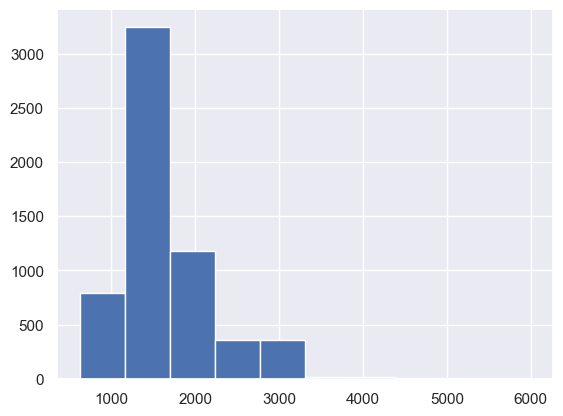

In [12]:
df_encoded["Engine"].hist()

<AxesSubplot:>

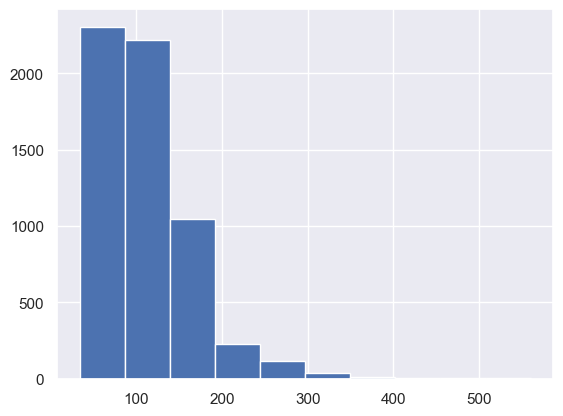

In [13]:
df_encoded["Power"].hist()

<AxesSubplot:>

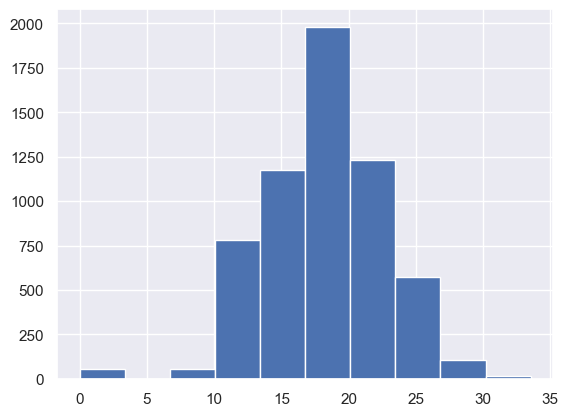

In [48]:
df_encoded["Mileage"].hist()

In [40]:
#grouping the features into feature vector "independent vector"
x=df_encoded[["Engine","Power","Transmission","Mileage","Year","Fuel_Type"]].values

In [41]:
#the dependent vector
y=df_encoded["Price"].values

In [42]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
#scaling the feature vector
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
#fitting the data into linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [45]:
#predicting the outputs of x_test
y_pred=lr.predict(x_test)

In [46]:
#checking the r2score of the lr model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.705538127086129